In [191]:
from brian2 import *
%matplotlib inline

In [192]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(30, 12))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=1)
    plot(ones(Nt), arange(Nt), 'ok', ms=1)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

In [453]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (0.04*v**2 + 5*v + 140 - u + I)/tau : 1
du/dt = a * (b*v - u)/tau : 1
dg/dt = -g/(5*tau) : 1
I : 1
'''

ws = 10;
# a = 0.05; b = 0.7  # should produce oscillation around 40Hz
a = 0.0275; b = 0.490  # should produce oscillation around 20Hz
# a = 0.025; b = 0.1  # should produce oscillation around 5Hz
I = 0; g = 0; v = 0; u = 0; g = 1

# TODO: add uniform dist. - bio. plaus.
c = -65; d = 8
n = 10; N = 500

# P = PoissonGroup(n, rates=1/tau)  # S_P = Synapses(P, G, on_pre='v += s')  # S_P.connect()
G = NeuronGroup(N, eqs, threshold='v>30', reset='''v=c; u=u+d; g=1''', method='euler')
# TODO: verify with one neuron!

P = n/N
N_excit = int(0.8 * N * n)
print('N_excit', N_excit)
S = Synapses(G, G, 'w : 1')
S.connect(condition='i!=j', p=P)
# as all neurons are randomly connected, this should work - 
#  however, could consider uniformly picking neurons from the population here, too
S[:N_excit].w = 'ws*g*ms'
S[N_excit:].w = '-ws*g*ms'

# visualise_connectivity(S)
# suptitle('p = '+str(P))

N_excit 4000


In [454]:
statemon = StateMonitor(G[:], 'v', record=True)
spikemon = SpikeMonitor(G[:], variables='v')

# create function/process where a random neuron is excited by 100 micro-Ampere per ms, and timestep
# G.I = 100
t = 1200
run(t*ms)

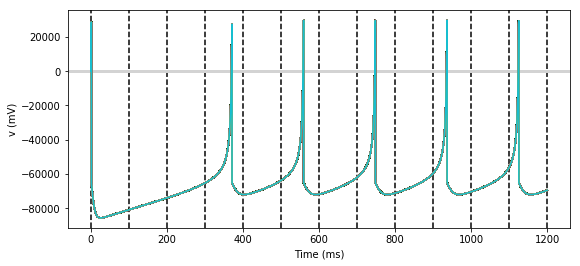

In [455]:
# run(100*ms)
# create spike plots
figure(figsize=(9, 4))
for l in range(13):
    axvline(l*100, ls='--', c='k')
axhline(30, ls='-', c='lightgray', lw=3)
plot(statemon.t/ms, statemon.v.T/mV, '-')
xlabel('Time (ms)')
ylabel('v (mV)');

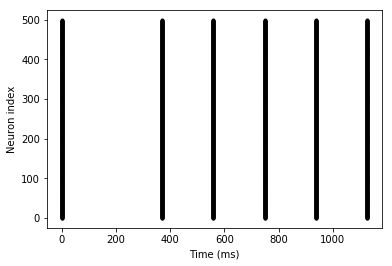

In [456]:
plot(spikemon.t/ms, spikemon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index');

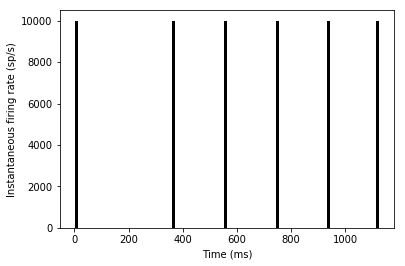

In [457]:
_ = hist(spikemon.t/ms, 100, histtype='stepfilled', facecolor='k', weights=ones(len(spikemon))/(N*defaultclock.dt))
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)');

In [460]:
output_rates = M.num_spikes/(t*ms)
print("avg. network firing rate: ", output_rates)

# plot(tau_range/ms, output_rates)
# xlabel(r'$\tau$ (ms)')
# plot(output_rates)
# xlabel('run #')
# ylabel('Firing rate (sp/s), or Hz');

avg. network firing rate:  100. Hz


In [ ]:
# ============ NOTES ==============
# output_rates = []
# store()
# for i in range(0, 10):
#     restore()
#     run(1*second)
#     output_rates.append(M.num_spikes/(N*second))